# 用两层 ReLU 神经网络逼近函数 $\sin(x) + x$

我们将使用纯 NumPy 实现一个两层的前馈神经网络（使用 ReLU 激活函数），并训练它去逼近一个非线性目标函数：

$$
f(x) = \sin(x) + x
$$

这个实验将从实证上说明，即使是浅层神经网络（只有一个隐藏层），只要隐藏神经元足够多，也能够逼近任意连续函数。

## 通用逼近定理（Universal Approximation Theorem）

定理大致内容：

对于任意一个连续函数 $f: \mathbb{R}^n \to \mathbb{R}$ 和任意精度 $\varepsilon > 0$，存在一个具有有限个神经元的两层前馈神经网络 $F(x)$，使得对于所有 $x$ 属于一个紧致集 $K$ 有：

$$
|f(x) - F(x)| < \varepsilon
$$

换句话说，只要我们用够多的隐藏神经元，即便是只有一层隐藏层的网络，也可以逼近任何连续函数。

---

我们使用如下结构的网络：

- 输入层：1个输入
- 隐藏层：$h$ 个神经元，激活函数为 ReLU
- 输出层：线性输出

神经网络模型表达式为：

$$
F(x) = W_2 \cdot \sigma(W_1 x + b_1) + b_2
$$

其中：
- $W_1 \in \mathbb{R}^{h \times 1}$，$b_1 \in \mathbb{R}^{h}$
- $W_2 \in \mathbb{R}^{1 \times h}$，$b_2 \in \mathbb{R}$
- $\sigma(z) = \max(0, z)$ 是 ReLU 激活函数

## 拟合目标函数

我们希望使用 ReLU 神经网络来拟合如下的函数：

$$
f(x) = \sin(x) + x
$$

这是一个非线性函数，包含周期成分和线性增长成分，对神经网络的拟合能力具有良好挑战性。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) + x

np.random.seed(0)
x_train = np.linspace(-5, 5, 200).reshape(-1, 1)
y_train = f(x_train)

## 网络结构与反向传播公式

设：
- 输入 $x \in \mathbb{R}^{n \times 1}$
- 隐藏层前激活值：$Z_1 = xW_1 + b_1$
- 隐藏层输出：$A_1 = \text{ReLU}(Z_1)$
- 输出层：$\hat{y} = A_1 W_2 + b_2$

我们使用均方误差损失函数（MSE）：

$$
L = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

---
### 反向传播关键梯度：

$$
\frac{\partial L}{\partial W_2} = A_1^\top \cdot \frac{2}{n}(\hat{y} - y)
$$

$$
\frac{\partial L}{\partial W_1} = x^\top \cdot \left[(\frac{2}{n}(\hat{y} - y) \cdot W_2^\top) \odot \text{ReLU}'(Z_1) \right]
$$

In [2]:
input_dim = 1
hidden_dim = 80 # 隐藏层为80
output_dim = 1
lr = 0.005
epochs = 10000

#初始化
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))


def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

## 训练

Epoch 0, Loss: 8.0294
Epoch 100, Loss: 0.3676
Epoch 200, Loss: 0.3236
Epoch 300, Loss: 0.2872
Epoch 400, Loss: 0.2567
Epoch 500, Loss: 0.2309
Epoch 600, Loss: 0.2093
Epoch 700, Loss: 0.1912
Epoch 800, Loss: 0.1761
Epoch 900, Loss: 0.1634
Epoch 1000, Loss: 0.1528
Epoch 1100, Loss: 0.1435
Epoch 1200, Loss: 0.1352
Epoch 1300, Loss: 0.1275
Epoch 1400, Loss: 0.1201
Epoch 1500, Loss: 0.1129
Epoch 1600, Loss: 0.1056
Epoch 1700, Loss: 0.0983
Epoch 1800, Loss: 0.0910
Epoch 1900, Loss: 0.0838
Epoch 2000, Loss: 0.0767
Epoch 2100, Loss: 0.0697
Epoch 2200, Loss: 0.0631
Epoch 2300, Loss: 0.0568
Epoch 2400, Loss: 0.0509
Epoch 2500, Loss: 0.0454
Epoch 2600, Loss: 0.0405
Epoch 2700, Loss: 0.0361
Epoch 2800, Loss: 0.0321
Epoch 2900, Loss: 0.0287
Epoch 3000, Loss: 0.0257
Epoch 3100, Loss: 0.0231
Epoch 3200, Loss: 0.0210
Epoch 3300, Loss: 0.0191
Epoch 3400, Loss: 0.0175
Epoch 3500, Loss: 0.0162
Epoch 3600, Loss: 0.0152
Epoch 3700, Loss: 0.0143
Epoch 3800, Loss: 0.0135
Epoch 3900, Loss: 0.0129
Epoch 4000, 

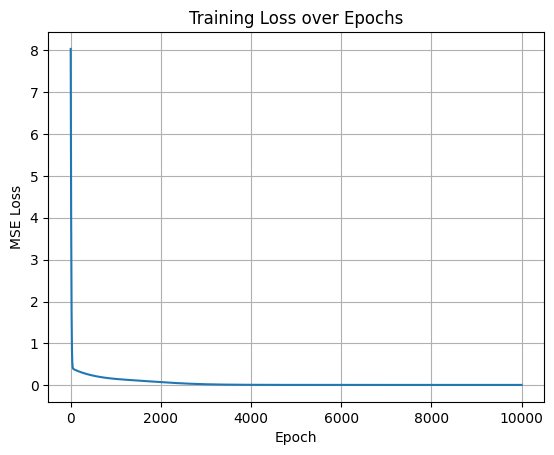

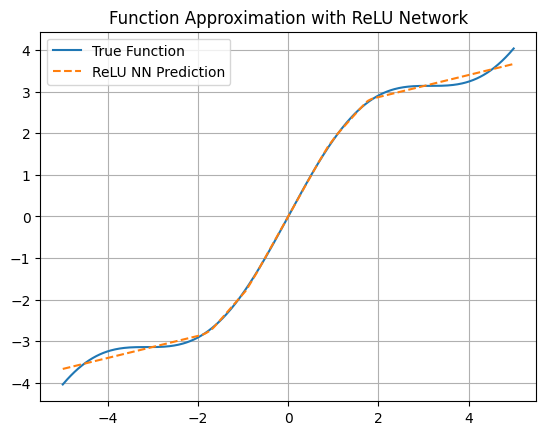

In [3]:
loss_list = []
for epoch in range(epochs):
    z1 = x_train @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_pred = z2

    loss = np.mean((y_pred - y_train)**2)
    loss_list.append(loss)

    grad_y_pred = 2 * (y_pred - y_train) / y_train.shape[0]
    grad_W2 = a1.T @ grad_y_pred
    grad_b2 = np.sum(grad_y_pred, axis=0, keepdims=True)

    grad_a1 = grad_y_pred @ W2.T
    grad_z1 = grad_a1 * relu_derivative(z1)
    grad_W1 = x_train.T @ grad_z1
    grad_b1 = np.sum(grad_z1, axis=0, keepdims=True)

    W2 -= lr * grad_W2
    b2 -= lr * grad_b2
    W1 -= lr * grad_W1
    b1 -= lr * grad_b1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

plt.plot(loss_list)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

x_test = np.linspace(-5, 5, 500).reshape(-1, 1)
z1_test = x_test @ W1 + b1
a1_test = relu(z1_test)
z2_test = a1_test @ W2 + b2
y_test_pred = z2_test

plt.plot(x_test, f(x_test), label='True Function')
plt.plot(x_test, y_test_pred, '--', label='ReLU NN Prediction')
plt.title("Function Approximation with ReLU Network")
plt.legend()
plt.grid(True)
plt.show()

可以看到，接近0点的部分有较好的拟合结果。但是对于远离0点的部分还需要修改参数来进行更好的拟合。

## 理论证明

## 通用逼近定理的理论证明（适用于两层 ReLU 神经网络）

---
### 1. ReLU 激活函数的可用性

我们使用的激活函数是 ReLU，定义如下：

$
\sigma(x) = \max(0, x)
$

虽然ReLU不满足Cybenko(1989)原始定理中“有界、连续”的激活函数条件，但后续研究表明，ReLU激活函数同样具备通用逼近能力。

**参考文献：**

- G. Cybenko. 1989. Approximation by superpositions of a sigmoidal function.
- K. Hornik, M. Stinchcombe, and H. White. 1989. Multilayer feedforward networks are universal approximators.

---

### 2. 证明思路

#### Step 1：ReLU可以构造分段线性函数

考虑神经网络的输出表达式：

$
F(x) = \sum_{i=1}^m \alpha_i \cdot \text{ReLU}(w_i^T x + b_i)
$

这种形式是多个 ReLU 单元的线性组合，表示一个连续的分段线性函数。


#### Step 2：分段线性函数可以逼近任意连续函数

根据实分析中的结论：在紧致集合 $K \subset \mathbb{R}^n$ 上，任意连续函数 $f$ 都可以被分段线性函数 $g$ 逼近到任意精度，即：

$
\forall \varepsilon > 0, \exists g \in \mathcal{P}, \text{使得} \ \|f - g\|_{\infty} < \varepsilon
$

其中 $\mathcal{P}$ 表示所有连续分段线性函数的集合。

#### Step 3：组合结论

- ReLU 网络可以表示分段线性函数；
- 分段线性函数在连续函数空间中是稠密的；

因此，两层的 ReLU 网络可以逼近任意连续函数。

---

### 3. 更进一步

Lu et al. (2017) 进一步证明：

任意 Lebesgue 可测函数都可以被一个宽度大于等于输入维度加一的两层 ReLU 网络准确表示。

这进一步说明：只要宽度足够，即使网络层数浅（仅两层），也可以具备强大的函数表达能力。
